In [3]:
import bnlearn as bn


In [9]:
import warnings
warnings.filterwarnings("ignore")

### Titanic


[df2onehot] >Auto detecting dtypes.


100%|██████████| 12/12 [00:00<00:00, 156.40it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████| 12/12 [00:00<00:00, 122.27it/s]


[df2onehot] >Total onehot features: 19
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


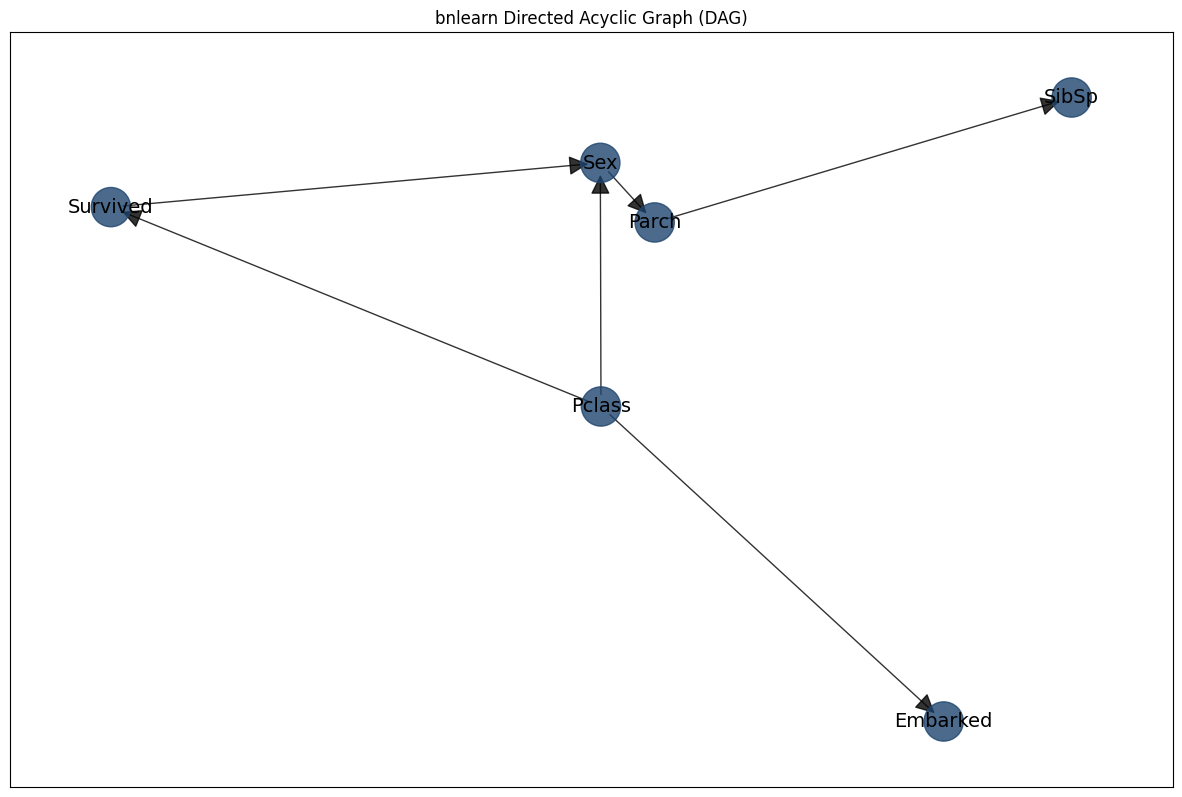

In [11]:
# Load titanic dataset containing mixed variables
df_raw = bn.import_example(data='titanic')

# Pre-processing of the input dataset
dfhot, dfnum = bn.df2onehot(df_raw)

# Structure learning
DAG = bn.structure_learning.fit(dfnum)

# Plot
G = bn.plot(DAG)

In [ ]:
model = bn.parameter_learning.fit(DAG, dfnum)


In [25]:

# Make inference
q = bn.inference.fit(model, variables=['Survived'], evidence={'Sex':0, 'Pclass':1})

q.df

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+------------+----------+
|    |   Survived |        p |
+====+============+==========+
|  0 |          0 | 0.331202 |
+----+------------+----------+
|  1 |          1 | 0.668798 |
+----+------------+----------+


,Survived,p
0,0,0.331202
1,1,0.668798


### Sprinkler

In [32]:
model_true = bn.import_DAG('sprinkler')

df = bn.sampling(model_true, n=10000)
# Structure learning of sampled dataset
model_learned = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')

model_learned['adjmat']


[bnlearn] >Import <sprinkler>
[bnlearn] >Check whether CPDs sum up to one.
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


target,Cloudy,Sprinkler,Rain,Wet_Grass
source,,,,
Cloudy,False,False,True,False
Sprinkler,True,False,True,True
Rain,False,False,False,False
Wet_Grass,True,False,True,False


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


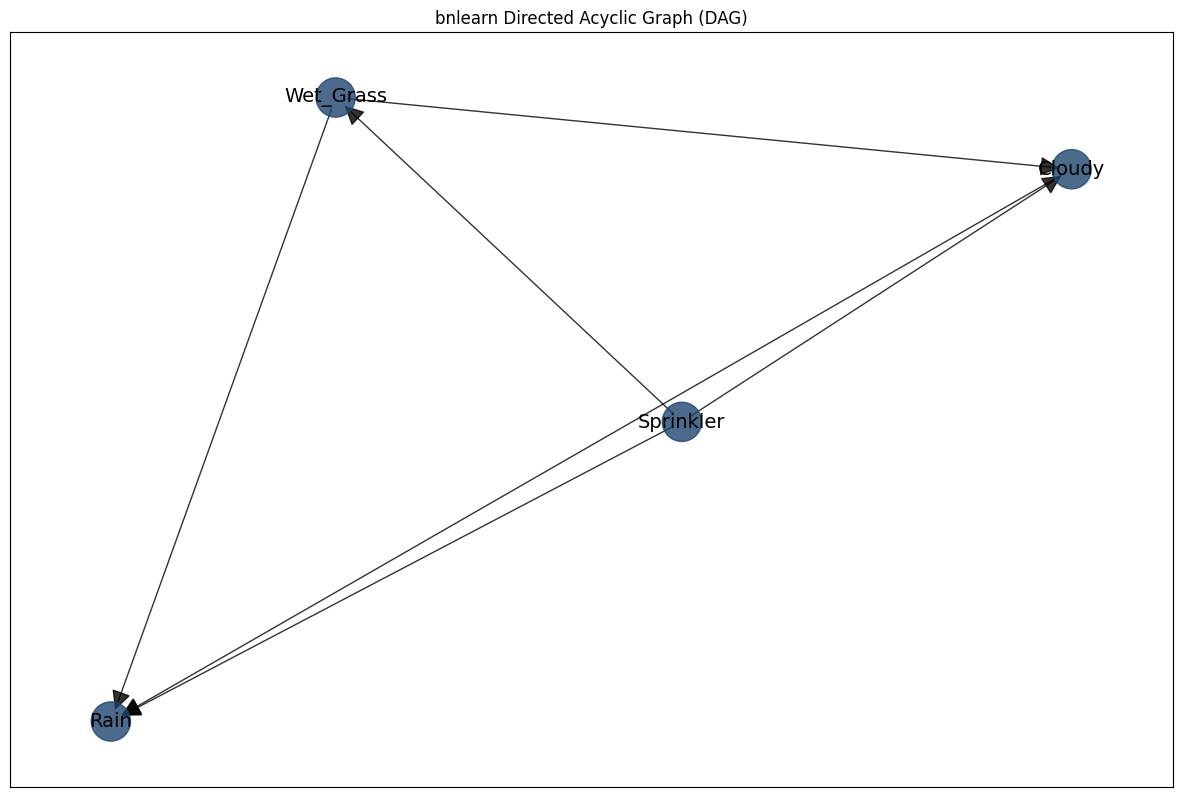

In [36]:
G = bn.plot(model_learned)

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


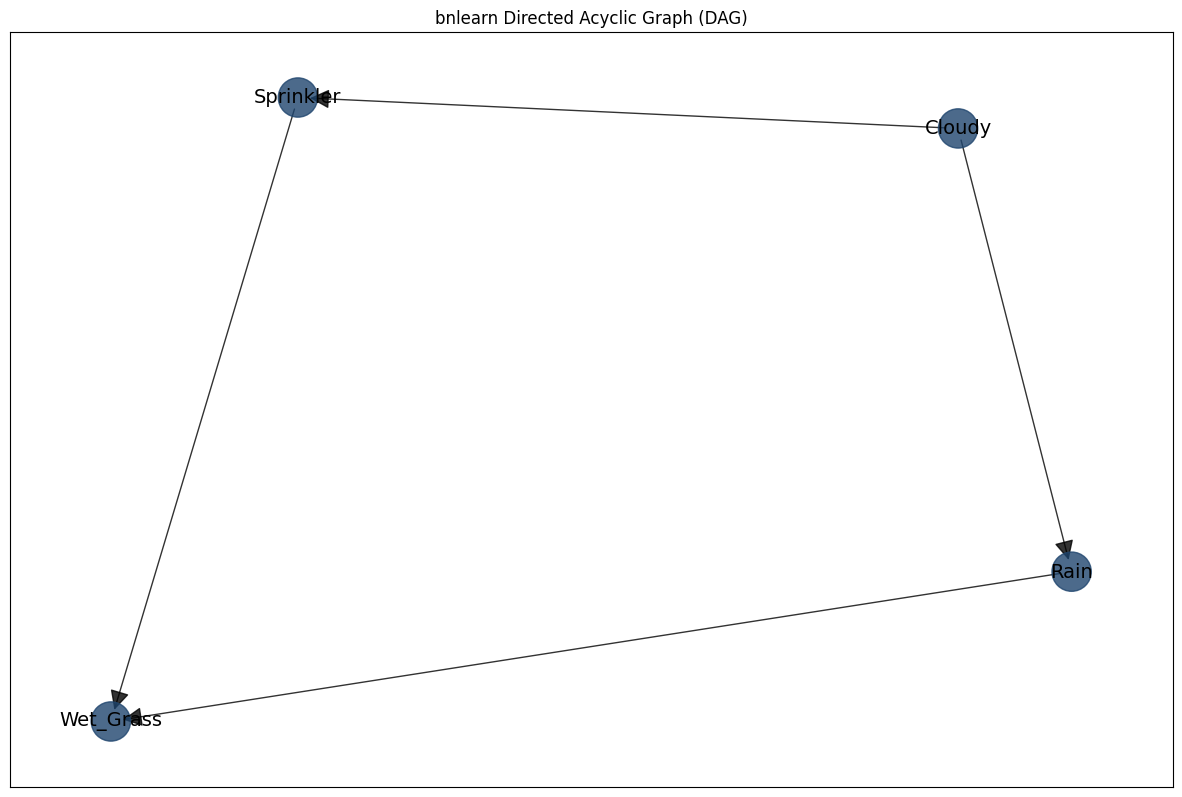

In [35]:
G = bn.plot(model_true)

### Asia Dataset

[bnlearn] >Import <asia>
[bnlearn] >Loading bif file <c:\Users\YASH MANIYA\AppData\Local\Programs\Python\Python39\lib\site-packages\datazets\data\asia.bif>
[bnlearn] >Check whether CPDs sum up to one.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


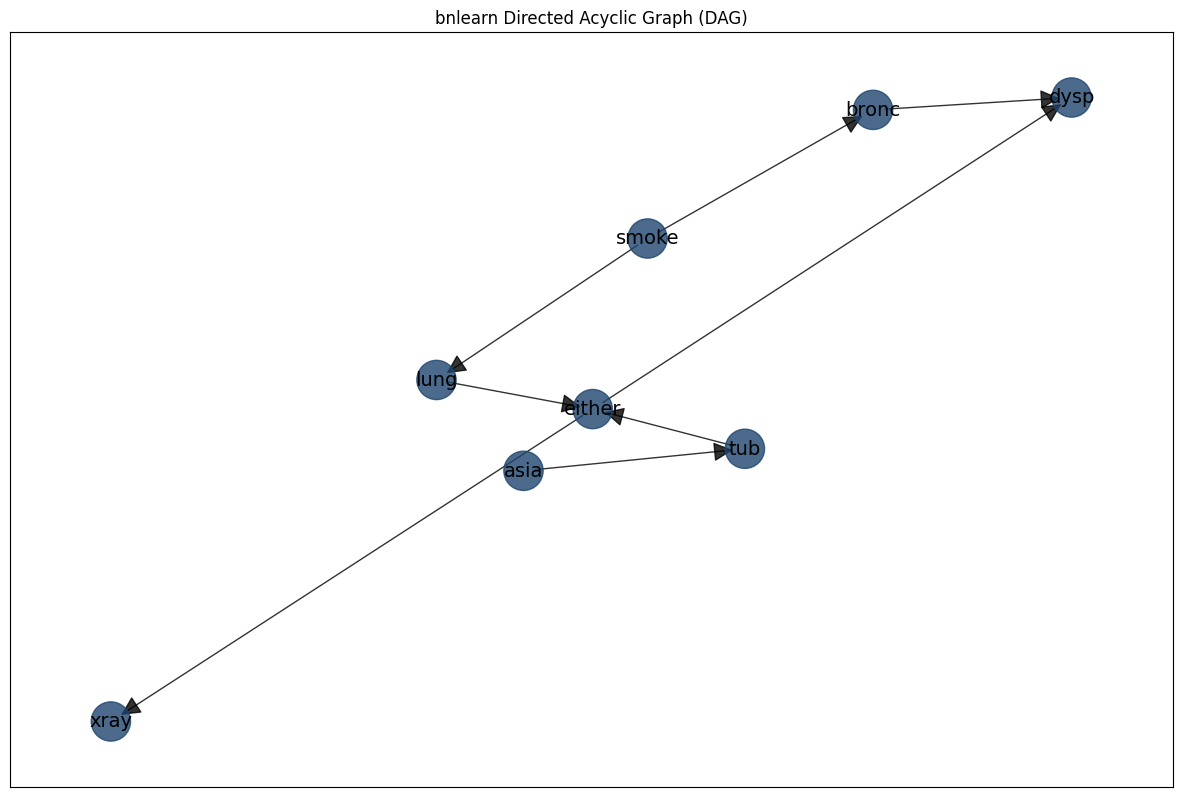

In [37]:
model_true = bn.import_DAG('asia')
# plot ground truth
G = bn.plot(model_true)

In [38]:
df = bn.sampling(model_true, n=10000)
# Structure learning of sampled dataset
model_learned = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model
[bnlearn] >Existing coordinates from <pos> are used.


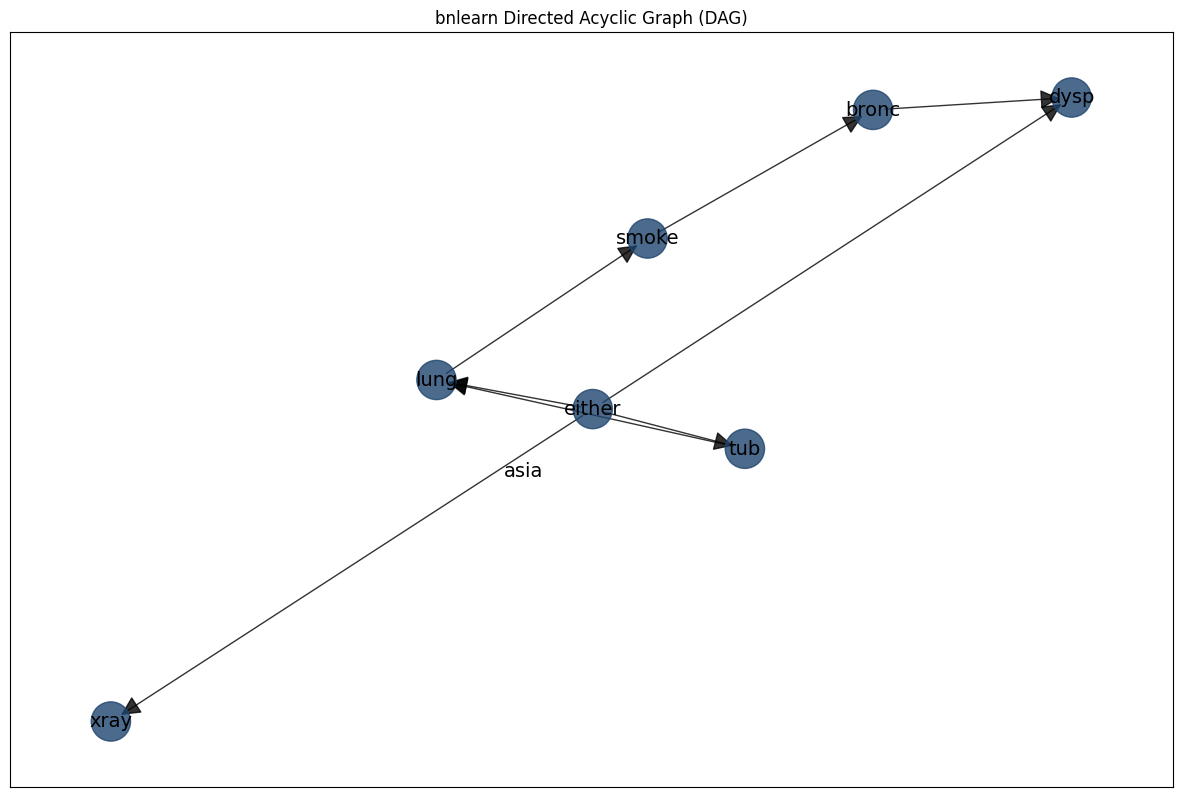

[bnlearn] >Existing coordinates from <pos> are used.


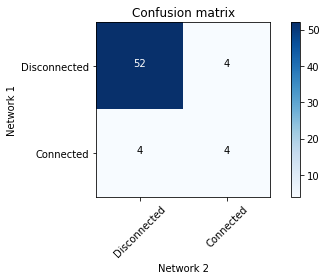

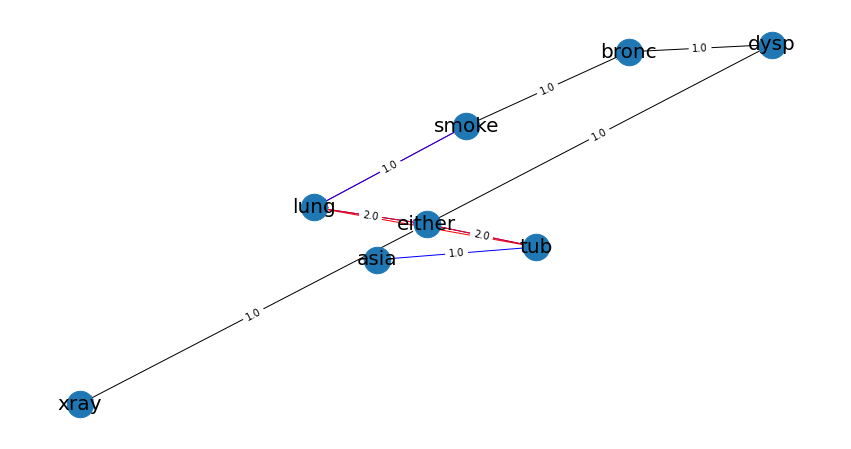

(array([[52,  4],
        [ 4,  4]], dtype=int64),
 target  asia  tub  smoke  lung  bronc  either  xray  dysp
 source                                                   
 asia       0   -1      0     0      0       0     0     0
 tub        0    0      0     2      0      -1     0     0
 smoke      0    0      0    -1      1       0     0     0
 lung       0    0      2     0      0      -1     0     0
 bronc      0    0      0     0      0       0     0     1
 either     0    2      0     2      0       0     1     1
 xray       0    0      0     0      0       0     0     0
 dysp       0    0      0     0      0       0     0     0)

In [41]:
bn.plot(model_learned, pos=G['pos'])
# Compare networks and make plot
bn.compare_networks(model_true, model_learned, pos=G['pos'])